In [1]:
from wmb import brain, cemba, mm10
import wmb
from ALLCools.mcds import MCDS
import pandas as pd
import pathlib
import scanpy as sc

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from qnorm import quantile_normalize
from wmb import cemba, mm10

In [2]:
meta = pd.read_csv('0523_seurat_metadata.csv', index_col = 0)

## check clustering

In [2]:
meta = pd.read_csv('0523_seurat_metadata.csv', index_col = 0)

var_dim = 'gene'
mc_type = 'CGN'

In [3]:
rna_matrix = pd.read_csv('novaseq_demux/count.csv')
rna_matrix = rna_matrix[meta.index]
rna_matrix = rna_matrix.T
# rna_matrix['cluster'] = meta['seurat_clusters']
# cluster_rna_matrix = rna_matrix.groupby('cluster').sum().T
# cluster_rna_matrix.to_csv('cluster_rna_matrix.csv')

In [4]:
adata = sc.AnnData(rna_matrix)

# Assign gene names and cell names (optional)
gene_names = rna_matrix.columns
cell_names = rna_matrix.index

adata.var_names = gene_names
adata.obs_names = cell_names

/home/qz/miniconda3/envs/allcools/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  """Entry point for launching an IPython kernel.


In [5]:
sc.pp.normalize_total(adata)

In [6]:
sc.pp.log1p(adata)

In [7]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

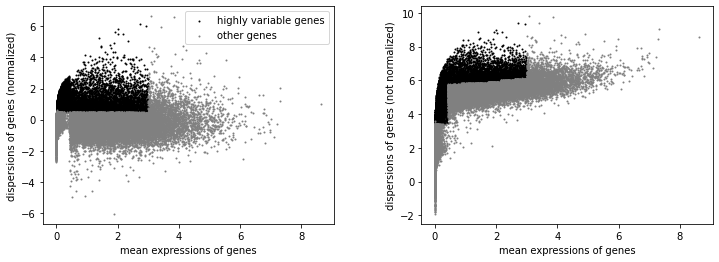

In [8]:
sc.pl.highly_variable_genes(adata)

In [9]:
adata = adata[:, adata.var.highly_variable]

In [10]:
sc.tl.pca(adata, svd_solver='arpack')

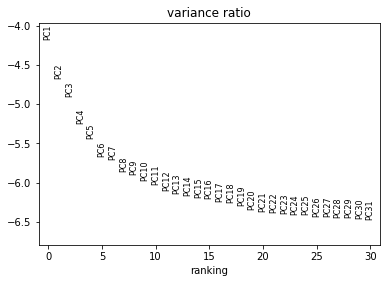

In [11]:
sc.pl.pca_variance_ratio(adata, log=True)

In [12]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=20)

In [13]:
sc.tl.umap(adata)

In [14]:
sc.tl.leiden(adata)

In [15]:
adata.obs['seurat_clusters'] = meta['seurat_clusters'].astype(str)
adata.obs['condition'] = meta['condition']

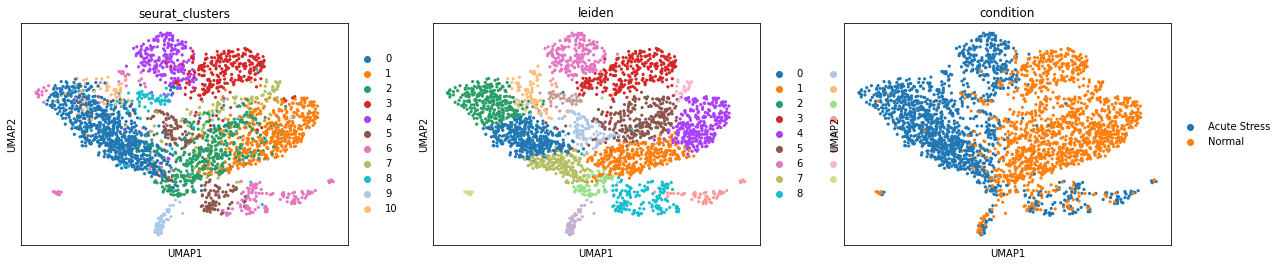

In [16]:
bsc.pl.umap(adata, color=['seurat_clusters','leiden','condition'])

## get normalized data

In [3]:
rna_matrix = pd.read_csv('novaseq_demux/count.csv')
rna_matrix = rna_matrix[meta.index]
rna_matrix = rna_matrix.T

In [4]:
rna_matrix['cluster'] = meta['seurat_clusters']
cluster_rna_matrix = rna_matrix.groupby('cluster').sum().T
#cluster_rna_matrix.to_csv('cluster_rna_matrix.csv')

In [7]:
# filter low exp gene
cluster_rna_matrix = cluster_rna_matrix[cluster_rna_matrix.mean(axis=1) > 1]

In [8]:
# normalize million counts
million_counts = cluster_rna_matrix.sum(axis=0) / 1000000
cluster_rna_matrix /= million_counts

In [9]:
norm_rna_data = quantile_normalize(cluster_rna_matrix)
log_rna_data = np.log1p(norm_rna_data)

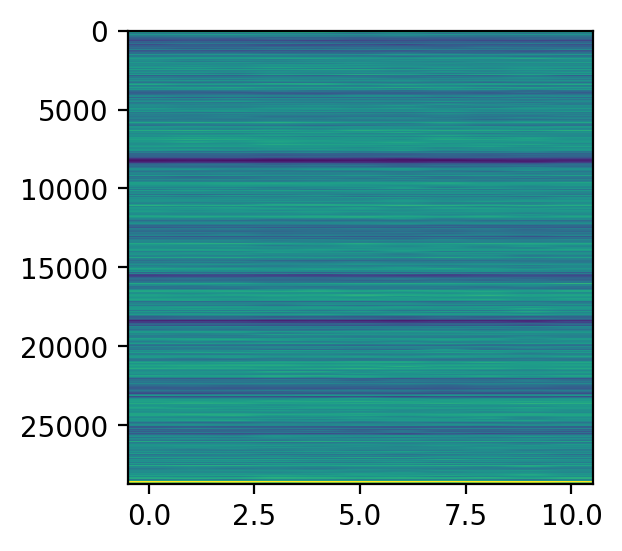

In [10]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=200)
ax.imshow(log_rna_data, aspect='auto', vmin=0, vmax=4)

In [11]:
log_rna_data.to_csv('cluster_rna_matrix.csv')

In [12]:
log_rna_data

cluster,0,1,2,3,4,5,6,7,8,9,10
AT1G01010,2.568524,0.899779,0.912234,1.371048,0.723647,2.624670,3.070352,2.385624,2.682600,2.013637,1.220179
AT1G01020,4.553697,4.375481,4.962900,4.729297,4.112070,4.947140,4.314810,5.135655,4.258723,3.992229,4.914594
AT1G01030,3.376383,3.556381,3.751985,2.533097,1.967541,3.331000,2.692878,2.730864,0.897068,4.378245,1.446512
AT1G01040,4.525706,5.213746,5.012488,5.209019,3.988340,4.661843,4.622950,4.706292,4.699130,5.321428,4.067791
AT1G01050,4.111291,4.355783,3.996077,2.539769,2.873940,3.481210,4.125207,4.123539,3.803395,4.052456,4.080047
...,...,...,...,...,...,...,...,...,...,...,...
ATMG01410,0.010051,0.037156,0.020690,0.011503,0.002399,0.093916,0.042820,0.049737,0.051206,0.031966,0.021685
ATMG09740,0.000549,0.006599,0.784684,0.033071,0.151756,0.112543,0.059330,0.035221,0.013774,0.031966,0.021685
ATMG09950,0.000000,0.000247,0.027920,0.001095,0.002399,0.169238,0.003242,0.004858,0.013774,0.031966,0.021685
ATMG09960,0.013406,0.011364,0.020690,0.005568,0.002399,0.028613,0.015673,0.004858,0.013774,0.031966,0.021685


In [13]:
cherry_genes = ['AT2G10940','AT4G30400','AT4G04610',
                'AT2G33380','AT1G57590','AT5G53450']

In [14]:
log_rna_data.loc[cherry_genes]

cluster,0,1,2,3,4,5,6,7,8,9,10
AT2G10940,5.517494,5.154795,6.343196,4.251868,4.245369,4.930830,4.284484,5.387896,5.433846,3.665525,5.291523
AT4G30400,0.796374,1.619278,0.966547,5.690886,4.833698,1.567691,1.570574,1.318510,0.203581,0.031966,0.123910
AT4G04610,4.935903,4.168081,4.090663,4.517231,3.777868,6.301723,5.680080,5.085609,5.251705,4.580340,4.269937
AT2G33380,5.537393,3.748508,5.120438,4.834337,5.494743,5.936372,7.453509,4.636079,5.967045,5.748291,7.066064
AT1G57590,5.218423,4.631041,3.498045,2.363922,3.750436,5.112285,5.192696,4.834337,5.126096,3.459687,6.029352
AT5G53450,7.141903,5.189047,6.618569,5.771725,6.602314,6.929088,5.968773,7.295676,7.150620,6.714694,7.273798
